<a href="https://colab.research.google.com/github/ifky06/PCVK/blob/main/Praktikum9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ahmad Rifki Fauzi**
# **TI-3B/04**

In [ ]:
import cv2 as cv
import numpy as np

from skimage import filters
from skimage import img_as_float
from matplotlib import pyplot as plt
from skimage import io, color, morphology
from skimage.morphology import skeletonize

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

In [ ]:
def dilasi_citra(F, w):
    height, width = F.shape

    image_copy = np.zeros((height, width), dtype=np.uint8)

    # generate structure element
    structure_element = np.ones((w,w), dtype=np.uint8)
    constant = (w - 1) // 2

    # melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
            product = temp * structure_element
            image_copy[i,j]= np.max(product)

    return image_copy

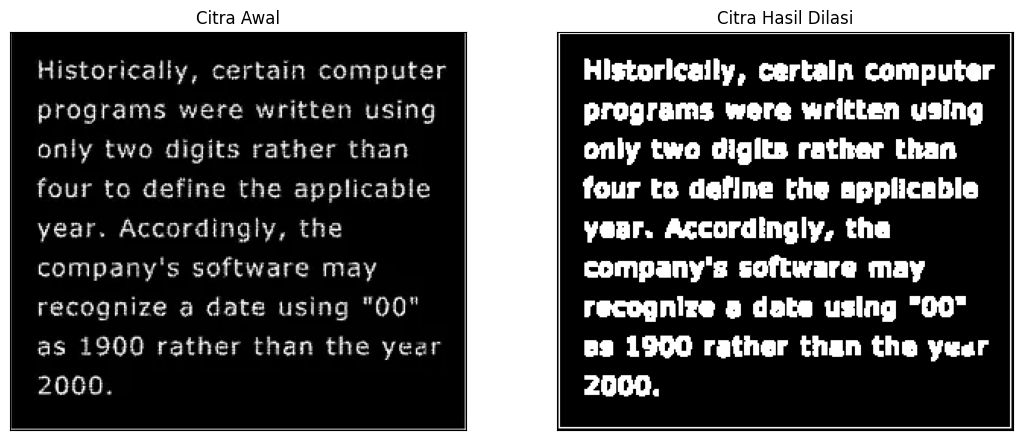

In [ ]:
image = cv.imread('morphology.png', 0)

w = 3
ret, thresh = cv.threshold(image , 125, 200, cv.THRESH_BINARY)
image_copy = dilasi_citra(thresh, w)

plt.figure(figsize=(20,20))

plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


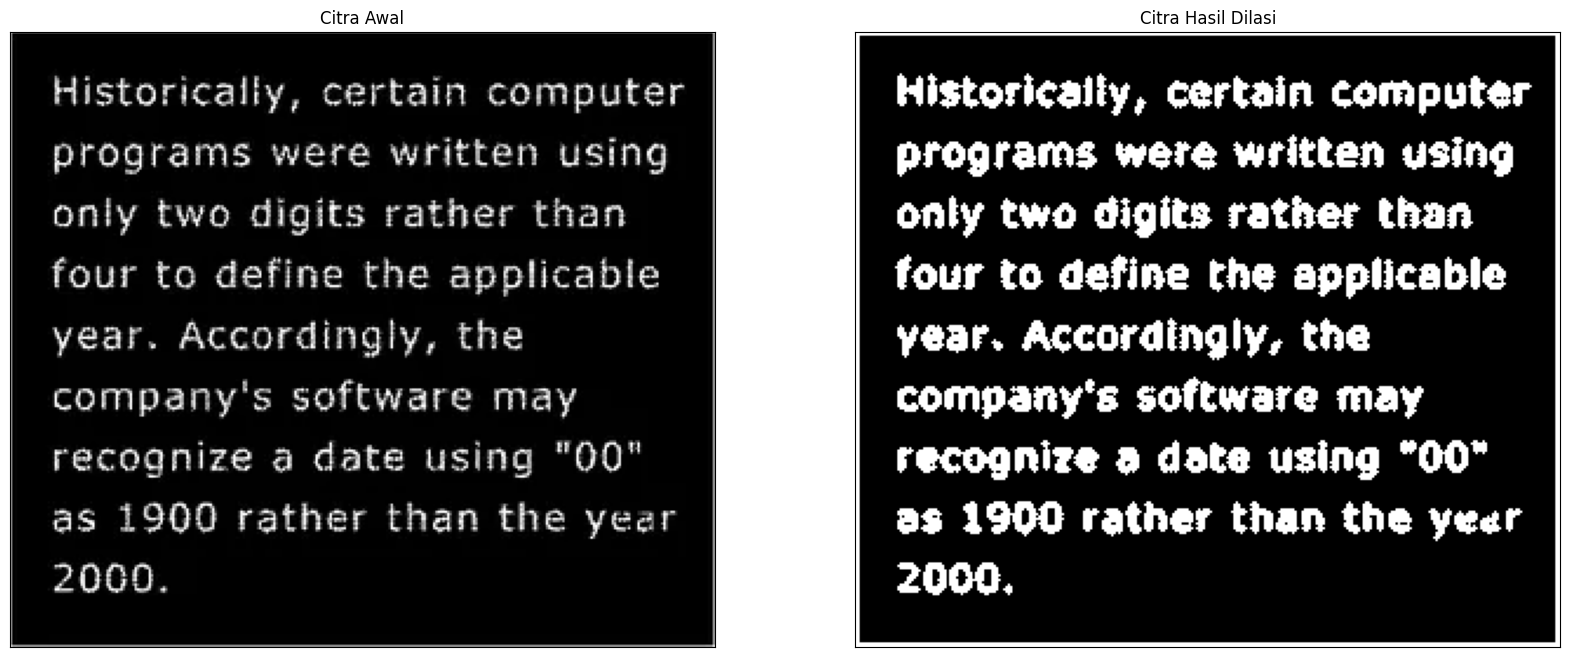

In [ ]:
image = cv.imread('morphology.png', 0)

ret, thresh = cv.threshold(image , 125, 200, cv.THRESH_BINARY)
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)
dilasi = cv.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.figure(figsize=(20,20))

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(dilasi, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

In [ ]:
def erosi_citra(F, k):
  height, width = F.shape

  structural_erosi = np.ones((k,k), dtype=np.uint8)
  constant = (k - 1) // 2

  image_copy = np.zeros((height, width), dtype=np.uint8)
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structural_erosi
      image_copy[i,j] = np.min(product)

  return image_copy

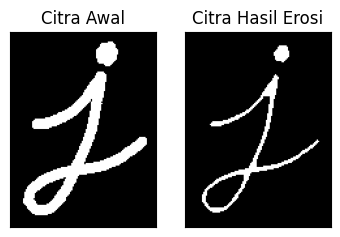

In [ ]:
image = cv.imread('j.png', 0)

k = 5
ret, thresh = cv.threshold(image, 175, 225, cv.THRESH_BINARY)
image_copy = erosi_citra(thresh, k)

plt.subplot(131), plt.imshow(image, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(image_copy, cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

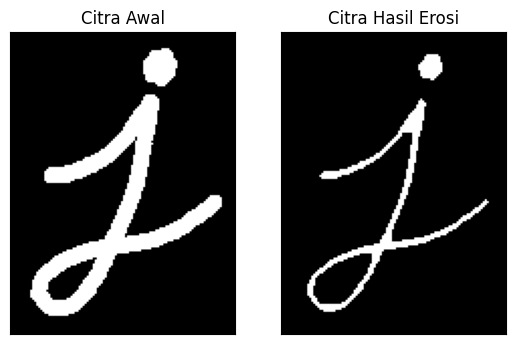

In [ ]:
image = cv.imread('j.png')
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(image, kernel,iterations = 1)

plt.subplot(121),plt.imshow(image),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

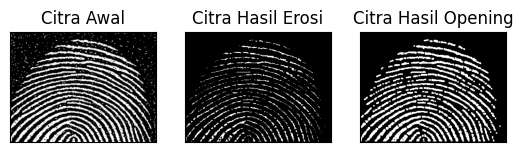

In [ ]:
image = cv.imread('fingerprint.png', 0)

k = 3
reto, thresh = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
image_erosion = erosi_citra(thresh,k)
image_result = dilasi_citra(image_erosion,k)

plt.subplot(131), plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_erosion, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(image_result, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

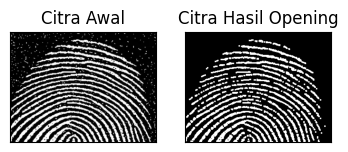

In [ ]:
#Dengan Menggunakan Library
img = cv.imread('fingerprint.png', 0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
open = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(open,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

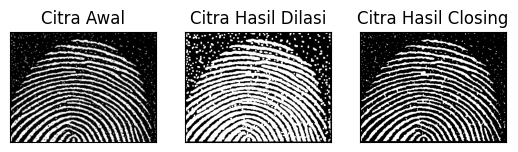

In [ ]:
image = cv.imread('fingerprint.png', 0)

k = 3
reto, thresh = cv.threshold(image, 127, 225, cv.THRESH_BINARY)
image_dilation = dilasi_citra(thresh,k)
image_result = erosi_citra(image_dilation,k)

plt.subplot(131), plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_dilation, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(image_result, cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

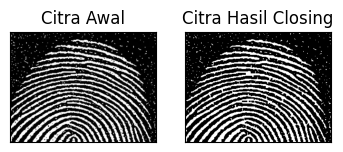

In [ ]:
#Dengan Menggunakan Library
img = cv.imread('fingerprint.png', 0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
open = cv.morphologyEx(thresh,cv.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(open,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

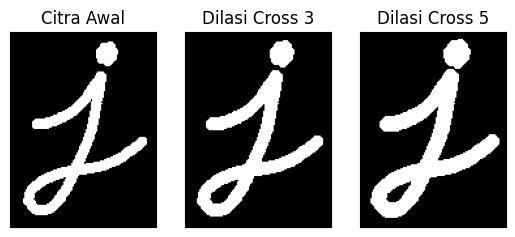

In [ ]:
img_d = cv.imread('j.png', 0)

sed_3x3 = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

sed_5x5 = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [1, 1, 1, 1, 1],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

# Lakukan operasi dilasi dengan SED 3x3
dilated_image_3x3 = cv.dilate(img_d, sed_3x3, iterations=1)
dilated_image_5x5 = cv.dilate(img_d, sed_5x5, iterations=1)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(dilated_image_3x3,cmap = 'gray')
plt.title('Dilasi Cross 3'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(dilated_image_5x5,cmap = 'gray')
plt.title('Dilasi Cross 5'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

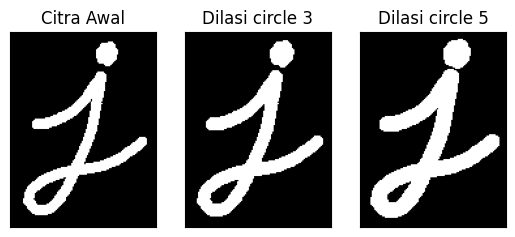

In [ ]:
img_d = cv.imread('j.png', 0)

sed_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

sed_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Lakukan operasi dilasi dengan SED 3x3
dilated_image_3x3 = cv.dilate(img_d, sed_3x3, iterations=1)
dilated_image_5x5 = cv.dilate(img_d, sed_5x5, iterations=1)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(dilated_image_3x3,cmap = 'gray')
plt.title('Dilasi circle 3'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(dilated_image_5x5,cmap = 'gray')
plt.title('Dilasi circle 5'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

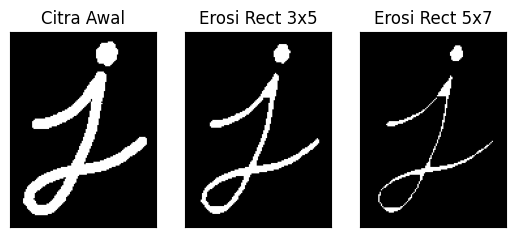

In [ ]:
img_d = cv.imread('j.png', 0)

sed_3x5 = np.ones((3, 5), dtype=np.uint8)

sed_5x7 = np.ones((5, 7), dtype=np.uint8)

eroded_image_3x5 = cv.erode(img_d, sed_3x5, iterations=1)
eroded_image_5x7 = cv.erode(img_d, sed_5x7, iterations=1)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(eroded_image_3x5,cmap = 'gray')
plt.title('Erosi Rect 3x5'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(eroded_image_5x7,cmap = 'gray')
plt.title('Erosi Rect 5x7'), plt.xticks([]), plt.yticks([])

plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

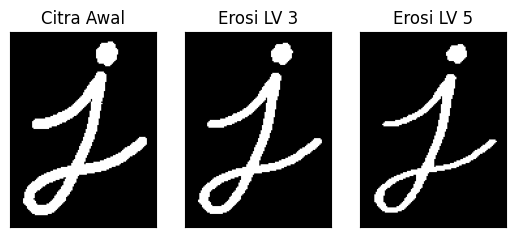

In [ ]:
img_d = cv.imread('j.png', 0)

sed_3 = np.ones((3, 1), dtype=np.uint8)

sed_5 = np.ones((5, 1), dtype=np.uint8)

eroded_image_3 = cv.erode(img_d, sed_3, iterations=1)
eroded_image_5 = cv.erode(img_d, sed_5, iterations=1)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(eroded_image_3,cmap = 'gray')
plt.title('Erosi LV 3'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(eroded_image_5,cmap = 'gray')
plt.title('Erosi LV 5'), plt.xticks([]), plt.yticks([])

plt.show()